In [1]:
from Utils.datasetReader import GraphReader
from Utils.utils import *
import random
from Utils.network_communities import NetworkCommunities
from machine_learning.label_prediction import LabelPrediction
import networkx as nx


بر اساس اطلاعات ارائه شده، می‌توانیم مهم‌ترین گره‌ها را در نمودار با استفاده از معیارهای مختلف شبکه به شرح زیر تجزیه و تحلیل کنیم:

مرکزیت بین: 5 گره برتر با بالاترین مرکزیت بین 1103985، 1127430، 1128945، 1129027، و 1130847 هستند. این گره ها تأثیر زیادی بر جریان اطلاعات در داخل شبکه دارند، زیرا در بسیاری از کوتاه ترین مسیرها قرار دارند. .

مرکزیت نزدیکی: 5 گره برتر با بیشترین مرکزیت نزدیکی عبارتند از 4553، 1102548، 7041، 1120880، و 17821. این گره ها نزدیک ترین گره ها به سایر گره های شبکه هستند، به این معنی که می توانند اطلاعات را با کارایی بیشتری نسبت به سایر گره ها برقرار کنند.

مرکزیت درجه: 5 گره برتر با بالاترین درجه مرکزیت عبارتند از: 1128945، 1137466، 1152508، 1109017 و 191404. این گره ها بیشترین اتصالات را در شبکه دارند که نشان می دهد در انتشار اطلاعات بسیار تأثیرگذار هستند.

ضریب خوشه‌بندی: ضریب خوشه‌بندی اندازه‌گیری می‌کند که گروهی از گره‌ها در شبکه چقدر به هم متصل هستند. ما دو مقدار برای ضریب خوشه بندی داریم. مقدار اول 0.09349725626661058 و مقدار دوم 0.2406732985019372 است. این مقادیر نشان می دهد که شبکه دارای سطحی از خوشه بندی است، اما خیلی قوی نیست.

قطر: قطر شبکه 19 است که نشان می دهد کوتاه ترین مسیر بین هر دو گره در شبکه 19 است.

میانگین کوتاه ترین مسیر: متوسط کوتاه ترین مسیر در شبکه 1.170483515230952 است که نشان می دهد شبکه نسبتا کوچک و متصل است.

بر اساس این معیارها، می‌توان نتیجه گرفت که گره‌های 1128945، 1103985، و 4553 مهم‌ترین گره‌های شبکه هستند، زیرا در 5 مورد از معیارهای چندگانه مرکزی ظاهر می‌شوند. این گره ها تأثیر زیادی بر جریان اطلاعات دارند، نزدیک ترین گره ها به سایر گره های شبکه هستند و بیشترین اتصال را دارند. علاوه بر این، ضریب خوشه‌بندی نشان می‌دهد که گروه‌هایی از گره‌ها در شبکه وجود دارد، و متوسط کوچکترین مسیر نشان می‌دهد که شبکه به خوبی متصل است.

TIME FINISHED :  55.43216824531555
                    MY DataSets
**************************************************************************************************************
*                    Number of nodes : 2708                                                                  *
*                    Number of edges : 10556                                                                 *
*                    Density : 0.0014399999126942077                                                         *
*                    Clustering coefficient 1 0.09349725626661058                                            *
*                    Clustering coefficient 2 0.2406732985019372                                             *
*                    Diameter : 19                                                                           *
*                    Assortativity : -0.06587087427227858                                                    *
*                    Top 5 betweenness centra

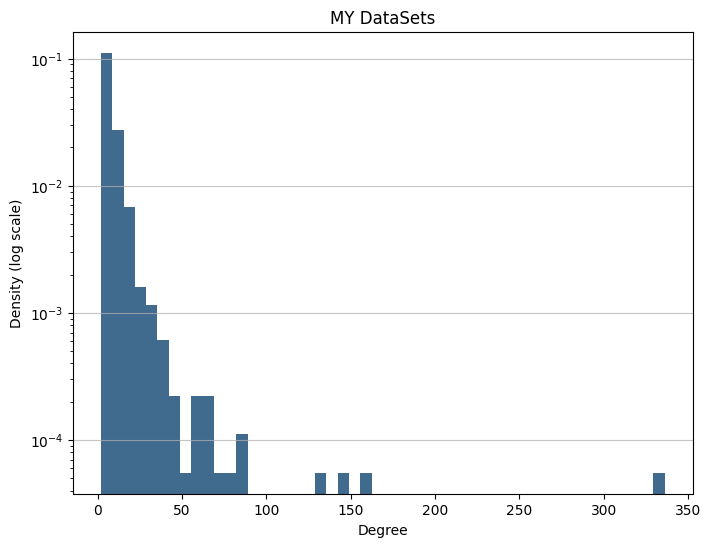

In [2]:
graphReader = []
graph_population = GraphReader(dataset="Datasets")
graphReader.append({"GR": graph_population, "title": "MY DataSets"})

# visualize metrics
for item in graphReader:
    visualize(
        params=calculateMetrics(item["GR"].get_graph()),
        G=item["GR"].get_graph(),
        title=item["title"],
    )


In [3]:
my_graph = colorize_graph(G=graph_population.get_graph(), node_path_csv="nodes.csv")

In [4]:
nc = NetworkCommunities(my_graph)

In [5]:
check_is_community_detection_good(G=my_graph, method=nc.communities_girvan_newman(), type_method = "girvan")
check_is_community_detection_good(G=my_graph, method=nc.communities_louvain_algorithm(), type_method = "louvain")

The modularity of the network is in girvan: 0.13072559406724654
The coverage of the network is: 1.0
The modularity of the network is in louvain: 0.5505540130904358
The coverage of the network is: 1.0


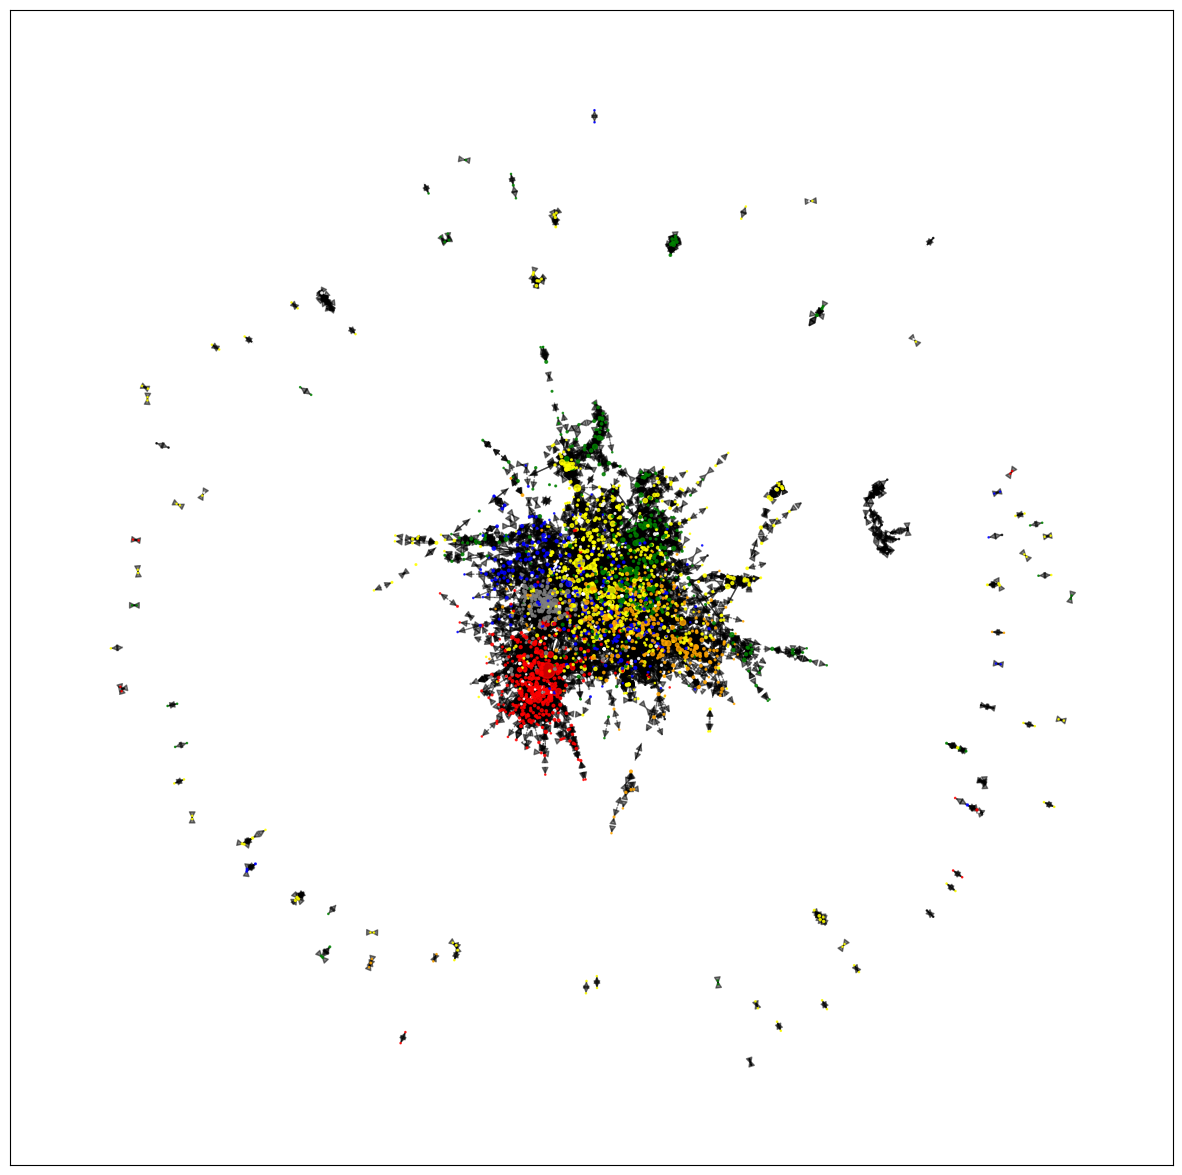

In [6]:
plot_draw_network_with_label(my_graph)

In [7]:
sicks = calculate_the_probability_to_unknown_node_get_sick(G=my_graph)

1152896  |  0.8
1153891  |  1.0
1153166  |  1.0
1153724  |  1.0
1153728  |  1.0
1153101  |  0.3333333333333333
1153150  |  0.3333333333333333
1152564  |  1.0
1153169  |  0.5
1152307  |  0.3333333333333333
1152448  |  0.3333333333333333
1152975  |  0.3333333333333333
1153703  |  0.3333333333333333
1153811  |  0.25
1138027  |  0.5
1153148  |  0.3333333333333333
1153003  |  0.25
1154500  |  1.0
1152308  |  1.0
1138091  |  1.0
1152244  |  1.0
1153877  |  1.0
1153879  |  1.0
1153889  |  1.0
1152436  |  1.0


In [ ]:

lp = LabelPrediction(G=my_graph)
lp.predictor_lp("knn")
lp.predictor_lp("rbf")
lp.predictor_svm()

Method knn
Predicted label for node 1136814: L2
Predicted label for node 1137466: L2
Predicted label for node 1152421: L2
Predicted label for node 1152508: L2
Predicted label for node 1153065: L2
Predicted label for node 1153280: L2
Predicted label for node 1153577: L2
Predicted label for node 1153853: L2
Predicted label for node 1153943: L2
Predicted label for node 1154176: L2
Predicted label for node 1154459: L2
Predicted label for node 1136397: L2
Predicted label for node 1140040: L2
Predicted label for node 1152194: L2
Predicted label for node 1152896: L2
Predicted label for node 1153945: L2
Predicted label for node 1154525: L2
Predicted label for node 1136422: L2
Predicted label for node 1136442: L2
Predicted label for node 1152143: L2
Predicted label for node 1152821: L2
Predicted label for node 1154169: L2
Predicted label for node 1153891: L2
Predicted label for node 1153166: L2
Predicted label for node 1153724: L2
Predicted label for node 1153728: L2
Predicted label for node 11